In [2]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 1000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData


tData = GrandTour(data, nSteps)



In [4]:
import time


distanceMatrix = np.zeros((178, 178))
oldDistanceMatrix = np.zeros((178, 178))
travelMatrix = np.zeros((178, 178))

start = time.clock()

for t in range(1000):
    if t % 100 == 0:
        print(time.clock() - start)

        
    travelMatrix = np.add(travelMatrix, np.absolute(np.subtract(distanceMatrix, oldDistanceMatrix)))
    if t != 0:
        oldDistanceMatrix = distanceMatrix
        distanceMatrix = np.zeros((178, 178))
        
    for i in range(len(tData[0][0])):
        x1Data = tData[t][0][i]
        y1Data = tData[t][1][i]
        
        for j in range(len(tData[0][0])):
            if i > j:
                continue
            x2Data = tData[t][0][j]
            y2Data = tData[t][1][j]
            distance = np.sqrt(((x1Data - x2Data) ** 2) + ((y1Data - y2Data) ** 2))
            distanceMatrix[i][j] = distance

travelMatrix = np.add(travelMatrix, travelMatrix.T)

0.00030200000000135674
5.645190000000003
11.231618999999998
16.815627000000003
22.395533000000004
28.236106000000003
33.877983
39.431506999999996
44.99883199999999
50.58229399999999


array([[ 0.        ,  5.18038204,  5.17715721, ..., 17.42674322,
        17.15172158, 16.54409641],
       [ 0.        ,  0.        ,  6.53406904, ..., 16.28824597,
        16.63521113, 16.80959593],
       [ 0.        ,  0.        ,  0.        , ..., 13.76087073,
        13.86442543, 15.21940619],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         3.07705362,  4.35969226],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.80213772],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

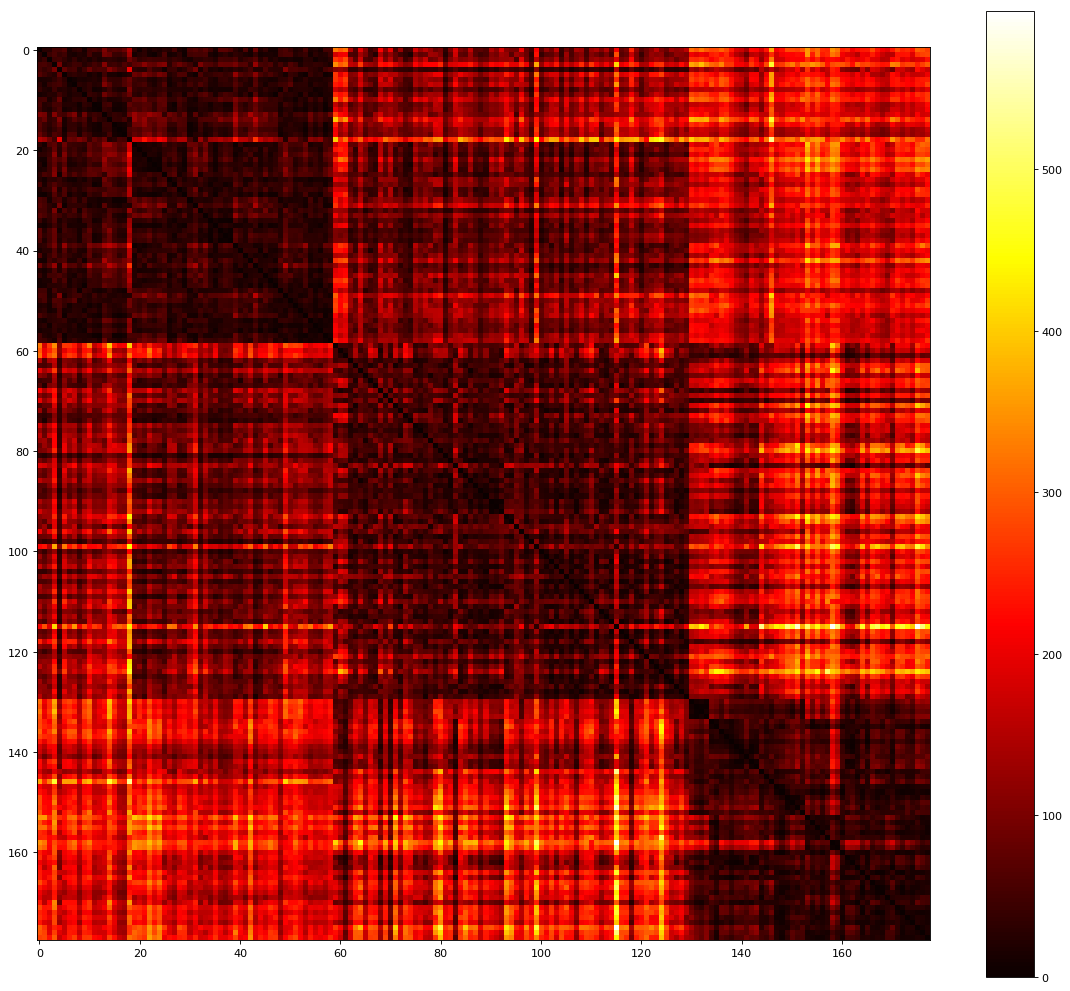

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(travelMatrix2, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [11]:
travelMatrix = np.add(travelMatrix, travelMatrix.T)

In [31]:
d = np.shape(travelMatrix)[0]
travelMatrix2 = np.power(travelMatrix, 2)

travelone = np.zeros((d,d))
for i in range(0,d):
    
    travelone[i][:] = np.sort(travelMatrix2[i])

In [28]:
travelsum = np.sum(travelone,axis=0)

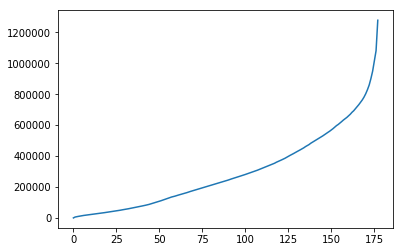

In [29]:
plt.plot(travelsum)

In [40]:
travelone = np.array((d,d))
travelone[1]

178

In [14]:
import igraph as ig

In [34]:
g = ig.Graph.Adjacency(travelMatrix.tolist())

TypeError: 'layout' is an invalid keyword argument for this function

In [52]:
g = g.layout_fruchterman_reingold()

In [53]:
plot = ig.plot(g)

In [54]:
plot.save("graph.png")

/home/dom/.local/lib/python3.5/site-packages/igraph/drawing/__init__.py:263: UserWarning: <Layout with 178 vertices and 2 dimensions> does not support plotting
  warn("%s does not support plotting" % obj)


In [65]:
indexlist = []
travelmat = travelMatrix[0]
# needs some debugging, as len of array decreases per iteration -> index not correct
for i in range(len(travelmat)):
    index = list(travelmat).index(min(travelmat))
    indexlist.append(index + i)
    travelmat = np.delete(travelmat, index)